# Plotting statistical formula to make sense of them

A 70% heads result becomes significant (p < 0.05) at a sample size of n = 9650


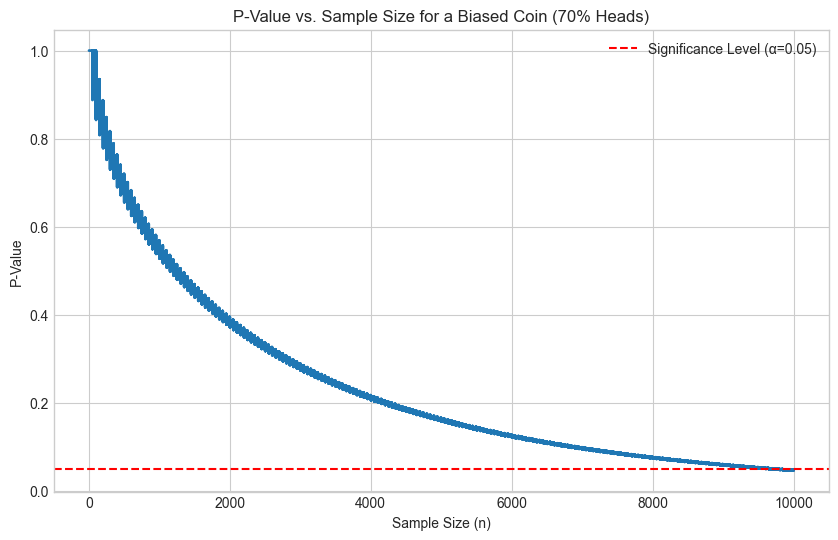

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binomtest

# --- 1. Calculate P-Values ---
# Use a list comprehension for a compact calculation
sample_sizes = range(1, 10001)
p_values = [binomtest(k=round(n * 0.51), n=n, p=0.5).pvalue for n in sample_sizes]

# --- 2. Find and Print the Crossover Point ---
# Find the first sample size where p-value drops below 0.05
significant_n = next(n for n, p in zip(sample_sizes, p_values) if p < 0.05)
print(f"A 70% heads result becomes significant (p < 0.05) at a sample size of n = {significant_n}")

# --- 3. Plot the Relationship ---
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot the p-value curve
sns.lineplot(x=sample_sizes, y=p_values, lw=2)

# Plot the significance threshold
plt.axhline(0.05, color='r', linestyle='--', label='Significance Level (α=0.05)')

plt.title('P-Value vs. Sample Size for a Biased Coin (70% Heads)')
plt.xlabel('Sample Size (n)')
plt.ylabel('P-Value')
plt.legend()
plt.show()

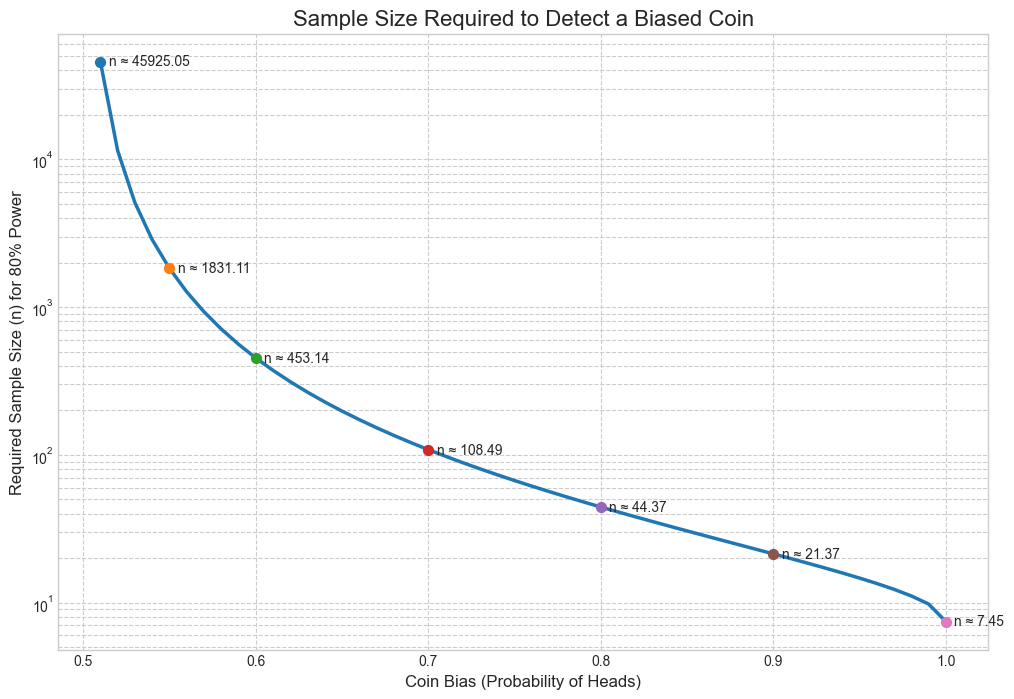

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.power import GofChisquarePower

# --- 1. Setup the Analysis ---
# Set our desired statistical parameters
significance_level = 0.05  # alpha
power_level = 0.99  # 1 - beta

# A range of coin biases (effect sizes) to test, from subtle to strong
# We start just above 50% since 50% would have an infinite sample size requirement
biases = np.linspace(0.51, 1, 50)
null_prob = 0.50

# List to store the results
required_sample_sizes = []

# --- 2. Calculate Sample Size for Each Bias ---
power_analyzer = GofChisquarePower()

for bias in biases:
    # The effect size for a one-proportion test is calculated using Cohen's h
    # It standardizes the difference between the null (0.5) and alternative (the bias) proportions
    effect_size = 2 * (np.arcsin(np.sqrt(bias)) - np.arcsin(np.sqrt(null_prob)))

    # Use the solver to find the required sample size ('nobs')
    sample_size = power_analyzer.solve_power(
        effect_size=effect_size,
        alpha=significance_level,
        power=power_level
    )
    required_sample_sizes.append(sample_size)

# --- 3. Plot the Relationship ---
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Plot the curve
sns.lineplot(x=biases, y=required_sample_sizes, lw=2.5)

# Add annotations and labels
plt.title('Sample Size Required to Detect a Biased Coin', fontsize=16)
plt.xlabel('Coin Bias (Probability of Heads)', fontsize=12)
plt.ylabel('Required Sample Size (n) for 80% Power', fontsize=12)
plt.yscale('log')  # Use a log scale for the y-axis to see the dramatic changes

# Add some specific points for clarity
for p in [0.51, 0.55, 0.60, 0.70, 0.8, 0.9, 1]:
    idx = (np.abs(biases - p)).argmin()
    n = required_sample_sizes[idx]
    plt.scatter(p, n, s=50, zorder=5)
    plt.text(p + 0.005, n, f"n ≈ {round(n, 2)}", va='center')

plt.grid(True, which="both", ls="--")
plt.show()
